<a href="https://colab.research.google.com/github/S3330/hw2/blob/main/object_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !unzip -q drive/MyDrive/Colab\ Notebooks/drive-download-20211124T164128Z-001.zip

replace config.json? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
yes


In [ ]:
# !unzip -q train.zip -d drive/MyDrive/Colab\ Notebooks/

In [1]:
!git clone https://github.com/penny4860/Yolo-digit-detector.git
!git clone https://github.com/penny4860/svhn-voc-annotation-format.git

Cloning into 'Yolo-digit-detector'...
remote: Enumerating objects: 4287, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 4287 (delta 0), reused 0 (delta 0), pack-reused 4284
Receiving objects: 100% (4287/4287), 179.30 MiB | 30.39 MiB/s, done.
Resolving deltas: 100% (2862/2862), done.
Cloning into 'svhn-voc-annotation-format'...
remote: Enumerating objects: 46553, done.
remote: Total 46553 (delta 0), reused 0 (delta 0), pack-reused 46553
Receiving objects: 100% (46553/46553), 7.94 MiB | 17.40 MiB/s, done.
Resolving deltas: 100% (46484/46484), done.
Checking out files: 100% (46487/46487), done.


In [2]:
!cp ./drive/MyDrive/Colab\ Notebooks/Yolo-digit-detector/requirements.txt ./

In [3]:
!pip install -r requirements.txt

     |████████████████████████████████| 109.3 MB 60 kB/s 
     |████████████████████████████████| 302 kB 50.4 MB/s 
     |████████████████████████████████| 631 kB 38.8 MB/s 
     |████████████████████████████████| 488 kB 47.0 MB/s 
     |████████████████████████████████| 3.1 MB 39.7 MB/s 
     |████████████████████████████████| 50 kB 7.0 MB/s 
     |████████████████████████████████| 213 kB 48.3 MB/s 
     |████████████████████████████████| 280 kB 45.3 MB/s 
  Created wheel for imgaug: filename=imgaug-0.2.6-py3-none-any.whl size=654020 sha256=36c704c1d9232f828e3eabbe74c0ee9c9c1d7c0e27f9e206ffd8a915408adb6c
  Stored in directory: /root/.cache/pip/wheels/89/72/98/3ebfdba1069a9a8eaaa7ae7265cfd67d63ef0197aaee2e5f9c
Successfully built imgaug
  Attempting uninstall: pluggy
    Found existing installation: pluggy 0.7.1
    Uninstalling pluggy-0.7.1:
      Successfully uninstalled pluggy-0.7.1
  Attempting uninstall: coverage
    Found existing installation: coverage 3.7.1
    Uninstalling cove

In [4]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [5]:
!pip install h5py==2.10.0

     |████████████████████████████████| 2.9 MB 5.2 MB/s 
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0


In [6]:
# from google.colab import drive
# drive.mount('/content/drive')
!cp -r ./drive/MyDrive/Colab\ Notebooks/Yolo-digit-detector/* ./

In [7]:
# -*- coding: utf-8 -*-
import json
import cv2
from yolo.backend.utils.box import draw_scaled_boxes
import os
import yolo

Using TensorFlow backend.


In [8]:
from yolo.frontend import create_yolo

# 1. create yolo instance
yolo_detector = create_yolo("ResNet50", ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], 416)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.



/tensorflow-1.15.2/python3.7/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


94658560/94653016 [==============================] - 1s 0us/step
Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 416, 416, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 422, 422, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 208, 208, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 208, 208, 64) 256         conv1[0][0]                      
___________________________

In [ ]:
# !cp drive/MyDrive/Colab\ Notebooks/train/digitStruct.mat ./

In [ ]:
# import h5py
# digi_file = './digitStruct.mat'
# f = h5py.File(digi_file, 'r')
# bboxs = f['digitStruct/bbox']

# def get_img_boxes(f, idx=0):
#     """
#     get the 'height', 'left', 'top', 'width', 'label' of bounding boxes of an image
#     :param f: h5py.File
#     :param idx: index of the image
#     :return: dictionary
#     """
#     meta = { key : [] for key in ['height', 'left', 'top', 'width', 'label']}

#     box = f[bboxs[idx][0]]
#     for key in box.keys():
#         if box[key].shape[0] == 1:
#             meta[key].append(int(box[key][0][0]))
#         else:
#             for i in range(box[key].shape[0]):
#                 meta[key].append(int(f[box[key][i][0]][()].item()))

#     return meta

In [9]:
# 2. load pretrained weighted file
# Pretrained weight file is at https://drive.google.com/drive/folders/1Lg3eAPC39G9GwVTCH3XzF73Eok-N-dER

DEFAULT_WEIGHT_FILE = os.path.join('drive', 'MyDrive', 'Colab Notebooks', 'weights.h5')
yolo_detector.load_weights(DEFAULT_WEIGHT_FILE)

Loading pre-trained weights in drive/MyDrive/Colab Notebooks/weights.h5


In [ ]:
# import h5py
# import tqdm
# def get_box_data(index, hdf5_data):
#     meta_data = dict()
#     meta_data['height'] = []
#     meta_data['label'] = []
#     meta_data['left'] = []
#     meta_data['top'] = []
#     meta_data['width'] = []

#     def print_attrs(name, obj):
#         vals = []
#         if obj.shape[0] == 1:
#             vals.append(obj[0][0])
#         else:
#             for k in range(obj.shape[0]):
#                 vals.append(int(hdf5_data[obj[k][0]][0][0]))
#         meta_data[name] = vals

#     box = hdf5_data['/digitStruct/bbox'][index]
#     hdf5_data[box[0]].visititems(print_attrs)
#     return meta_data

# def get_name(index, hdf5_data):
#     name = hdf5_data['/digitStruct/name']
#     return ''.join([chr(v[0]) for v in hdf5_data[name[index][0]].value])

# mat_data = h5py.File('./digitStruct.mat')
# size = mat_data['/digitStruct/name'].size
# image_dict = {}
# for _i in tqdm.tqdm(range(size)):
#     image_dict[get_name(_i, mat_data)] = get_box_data(_i, mat_data)
#     # pic = get_name(_i, mat_data)
#     # box = get_box_data(_i, mat_data)
#     # print(pic, box)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
100%|██████████| 33402/33402 [03:15<00:00, 170.56it/s]


In [ ]:
# image_dict

In [ ]:
!mkdir ./drive/MyDrive/Colab\ Notebooks/svhn

In [10]:
!cp /content/configs/from_scratch.json ./drive/MyDrive/Colab\ Notebooks/

In [ ]:
# train
!python train.py -c configs/from_scratch.json

Using TensorFlow backend.
/content/drive/MyDrive/Colab Notebooks/svhn is already exists. Weight file in directory will be overwritten
Weight file and Config file will be saved in "/content/drive/MyDrive/Colab Notebooks/svhn"
['object']
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
2021-11-26 01:21:21.911352: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2021-11-26 01:21:21.938654: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-26 01:21:21.939553: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Found device 0 with properties: 
name: Tesla K80 major: 3 minor: 7 memoryClockRate(GHz): 0.8235
pciBusID: 0000:00:04.0
2021-11-26 01:21:21.940027: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynami

In [11]:
DEFAULT_IMAGE_FOLDER = os.path.join('drive', 'MyDrive', 'Colab Notebooks', 'test')
# img_files = os.listdir(DEFAULT_IMAGE_FOLDER)
img_files = [DEFAULT_IMAGE_FOLDER+'/%s'%f for f in os.listdir(DEFAULT_IMAGE_FOLDER)]
print(img_files[:5])

['drive/MyDrive/Colab Notebooks/test/355180.png', 'drive/MyDrive/Colab Notebooks/test/158169.png', 'drive/MyDrive/Colab Notebooks/test/150664.png', 'drive/MyDrive/Colab Notebooks/test/71250.png', 'drive/MyDrive/Colab Notebooks/test/367488.png']


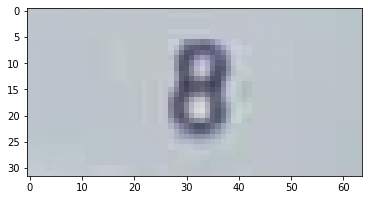

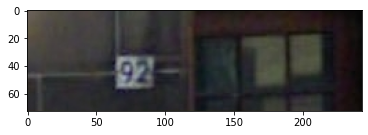

In [12]:
# 3. Load images
import os
import matplotlib.pyplot as plt
%matplotlib inline  
# DEFAULT_IMAGE_FOLDER = os.path.join(yolo.PROJECT_ROOT, "tests", "dataset", "svhn", "imgs")

# img_files = [os.path.join(DEFAULT_IMAGE_FOLDER, "1.png"), os.path.join(DEFAULT_IMAGE_FOLDER, "2.png")]
DEFAULT_IMAGE_FOLDER = os.path.join('drive', 'MyDrive', 'Colab Notebooks', 'test')

img_files = [DEFAULT_IMAGE_FOLDER+'/%s'%f for f in os.listdir(DEFAULT_IMAGE_FOLDER)]
imgs = []
for fname in img_files[:2]:
    img = cv2.imread(fname)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    imgs.append(img)
    plt.imshow(img)
    plt.show()

[8 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 3 0 0 0 0 0 0 7
 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 7 8 0 0 3 3 3 7 7 7 7 3 7 3 0 0 8 0 0 5
 0 3 3 7 7 9 0 9 7 3 3 3 0 0 0 0 1 3 3 0 9 9 0 8 9 0 3 3 0 0 0 0 0 0 0 3 3
 6 3 0 0 9 8 0 0 0 9 9 7 3 3 3 0 0 0 0 0 0 3 3 0 9 8 9 0 9 3 3 3 3 3 0 8 0
 0 0 3 3 6 9 9 7 3 3 3 0 0 0 0 9 7 0 0 0 5 0 6 7 8 8 0 0 0 0 0 0 0 0 0 3 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 7 0 0 0 0 8 5 0 0 0 0 0 0 0
 0 0 0 0 0 0 6 0 0 0]
232-boxes are detected.


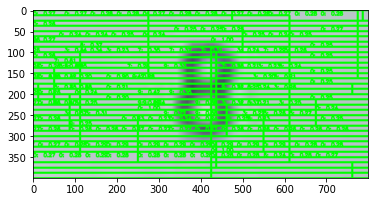

[0 0 0 0 0 0 1 0 0 0 0 7 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 5 0
 6 0 0 0 1 7 7 7 7 7 7 6 5 8 6 0 6 6 0 6 0 0 3 7 9 7 9 7 7 8 0 0 0 6 0 0 3
 9 0 6 9 0 3 3 7 3 7 7 8 3 0 6 0 0 0 0 3 0 9 9 0 9 3 3 7 7 3 6 6 0 0 3 3 3
 3 6 3 3 9 9 0 0 6 6 0 0 1 6 7 7 7 7 3 3 0 3 3 9 9 6 0 5 6 0 0 0 9 3 9 9 9
 9 6 0 6 0 0 7 9 9 3 7 3 9 9 0 9 9 6 0 6 0 0 0 0 0 0 1 0 0 0 3 0 0 0 0 0 0
 6 0 0 6 3 0 6 6 8 7 0 0 0 6 6 6 6 5 8 6 0 6 6 6 0 6 0 6 6 6 6 6 6 6 1 8]
221-boxes are detected.


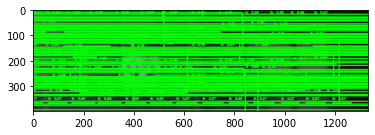

In [14]:
# 4. Predict digit region
import numpy as np
THRESHOLD = 0.2
for img in imgs:
  """
    probs 是一個 vector
    e.g. probs = [0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0.9]
    你可以用 argmax(probs) 得到最大那個值的 index 也就是 9
  """
  boxes, probs = yolo_detector.predict(img, THRESHOLD)
 
  print(np.argmax(np.array(probs), axis=1))

  # 4. save detection result
  image = draw_scaled_boxes(img,
                boxes,
                probs,
                ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"])

  print("{}-boxes are detected.".format(len(boxes)))
  plt.imshow(image)
  plt.show()

In [ ]:
# import numpy as np
# import h5py
# f = h5py.File('drive/MyDrive/Colab Notebooks/train/digitStruct.mat','r')
# bbox = f.get('digitStruct/bbox')
# name = f.get('digitStruct/name')

# bbox = np.array(bbox)
# name = np.array(name)

# data = np.array(data) # For converting to a NumPy array

In [ ]:
# print(f.items())
# print(data)
# for k, v in f.items():
#   print(v)

In [ ]:
# print(name)
# print(bbox)
# import scipy.sparse as sp
# out = sp.csc_matrix((f['digitStruct']['bbox'])).astype(np.float32)
# print(out)

In [ ]:
# bbox = f['digitStruct']['bbox']
# f[bbox[0][0]]['top'][0]
